In [ ]:
#-*- coding: utf-8 -*-
"""
File: bs_1D_properboundary.ipynb
Author: Eddie Kelly
Date: 2024

This file is part of the Quantum algorithm for linear systems of equations for the multi-dimensional Black-Scholes equations project which was completed as part 
of the thesis https://mural.maynoothuniversity.ie/id/eprint/19288/.

License: MIT License
"""

import sys
sys.path.append("../")
sys.path.append("../../")

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import bs_differential_op as bs_op 
from Matrices import matrixmod as mm
from lognormal import normal_1D_stock

# Consider the Black Scholes equation:
$$
\frac{\partial V}{\partial t}+\frac{1}{2}\sigma^{2}S^{2}\frac{\partial^{2}V}{\partial S^{2}}+rS\frac{\partial V}{\partial S} -rV = 0
$$


Consider also the boundary and initial conditions for the European put option:
$$
V(T,S)  = max(K-S,0)
$$
$$
V(t,0) = Ke^{-r(T-t)} \quad \forall \quad t
$$
$$
V(t,S) \sim 0 \quad as \quad S \rightarrow \infty
$$
Where the variables $T$ corresponds to maturity, $ K$ for strike price, $r$ for interest rate, $\sigma$ for volatility,
S for spot or current price and V for the value of the option.

---
First Substitution
---
Taking the following variables changes: 
$$
x = \ln(S) \qquad \tau = T-t
$$
The boundary and initial conditions for the Black-Scholes equation can be transformed using the new variables as follows:

1. **Initial condition:**

The initial condition for an European put option is given by:

$$
V(T,S)  = max(K-S,0)
$$

Using the variable change $x = \ln(S)$, the initial condition becomes:

$$
V(\tau=0, x) = max(K - e^x, 0)
$$

2. **Boundary conditions:**

The boundary conditions are given by:

$$
V(t,0) = Ke^{-r(T-t)} \quad \forall \quad t
$$

and

$$
V(t,S) \sim 0 \quad as \quad S \rightarrow \infty
$$

Using the variable change $x = \ln(S)$ and $\tau = T - t$, the boundary conditions become:

$$
V(\tau, x=-\infty) = K e^{-r\tau}
$$

and

$$
V(\tau, x=\infty) \sim 0
$$

The new Black Scholes differential equation is :
$$
\frac{\partial V}{\partial\tau} = \frac{1}{2}\sigma^{2}\frac{\partial^{2}V}{\partial x^{2}}+\left(r-\frac{\sigma^{2}}{2}\right)\frac{\partial V}{\partial x} -rV
$$
---
Second Substituition
---
Finally for the final substitution $W = e^{r\tau}V$ , we get the final form of the boundary/initial conditions:
If you switch to the variable $W = e^{r\tau}V$, the boundary and initial conditions for the Black-Scholes equation can be transformed as follows:

1. **Initial condition:**

The initial condition for an European put option is given by:

$$
V(\tau=0, x) = max(K - e^x, 0)
$$

Using the variable change $W = e^{r\tau}V$, the initial condition becomes:

$$
W(\tau=0, x) =  max(K - e^x, 0)
$$

2. **Boundary conditions:**

The boundary conditions are given by:

$$
V(\tau, x=-\infty) = K e^{-r\tau}
$$

and

$$
V(\tau, x=\infty) \sim 0
$$

Using the variable change $W = e^{r\tau}V$, the boundary conditions become:

$$
W(\tau, x=-\infty) = K
$$

and

$$
W(\tau, x=\infty) \sim 0
$$

These transformed conditions can now be used with the second - transformed Black-Scholes equation.
$$
\frac{\partial W}{\partial \tau} = \frac{1}{2}\sigma^{2}\frac{\partial ^{2}W}{\partial W^{2}}+\left(r-\frac{\sigma^{2}}{2}\right)\frac{\partial W}{\partial x}
$$
---


Refering to the thesis the boundary conditions(assuming proper derivative approximations) for the 1D case will be given by :
# Boundary conditions

Using the facts that 
$$
L(t) = K \quad \partial_{x}L(t) = 0
$$

$$
U(t) = 0 \quad \partial_{x}U(t) = 0
$$



## Boundary conditions for the "proper" scheme
$$
\vec{V}_{1} = \frac{\sigma^{2}}{2}\vec{B}_{(\partial^2 x)}(t)+\left(r-\frac{\sigma^{2}}{2}\right)\vec{B}_{(\partial x)}(t)
$$

$$
\begin{gather*}
\vec{V}_{1} = 
\frac{\sigma^{2}}{2}
    \begin{pmatrix}
     L(t) \\
     \vdots \\
     U(t)
     \end{pmatrix}
+\left(r-\frac{\sigma^{2}}{2}\right)
    \begin{pmatrix}
    -L(t) \\
    \vdots \\
    U(t) \\
    \end{pmatrix}
=
    \begin{pmatrix}
    (\sigma^{2}-r)L(t)\\
    \vdots\\
    rU(t)\\
    \end{pmatrix}         
\Rightarrow         
    \begin{pmatrix}
    (\sigma^{2}-r)K\\
    \vdots\\
    0\\
    \end{pmatrix}         
\
\end{gather*}
$$

## Boundary conditions for the "improper" scheme
$$
\vec{V}_{1} = \frac{\sigma^{2}}{2}\vec{\tilde{B}}_{(\partial^2 x)}(t)+\left(r-\frac{\sigma^{2}}{2}\right)\vec{B}_{(\partial x)}(t)
$$

$$
\begin{gather*}
\vec{V}_{1} = 
\frac{\sigma^{2}}{2}
    \begin{pmatrix}
     -2h \partial_{x}L(t) \\
     L(t) \\
     \vdots \\
     U(t) \\
     2h \partial_{x}U(t) \\
     \end{pmatrix}
+\left(r-\frac{\sigma^{2}}{2}\right)
    \begin{pmatrix}
    -L(t) \\
    0 \\
    \vdots \\
    0 \\
    U(t) \\
    \end{pmatrix}
=
\frac{\sigma^{2}}{2}
    \begin{pmatrix}
    0 \\
    K \\
    \vdots\\
    0\\
    0\\
    \end{pmatrix}         
+\left(r-\frac{\sigma^2}{2}\right)         
    \begin{pmatrix}
    -K \\
    0 \\
    \vdots\\
    0\\
    0 \\
    \end{pmatrix}         
=
    \begin{pmatrix}
    \left(\frac{\sigma^{2}}{2} - r\right)K \\
    \frac{\sigma^2}{2}K\\
    0 \\
    \vdots \\
    0 \\
    \end{pmatrix}
\end{gather*}
$$

---

In [98]:
#---Define the parameters relating to Black-Scholes model---#
S_0 = 80
K = 100
vol = 0.1
r = 0.05
T_0 = 1                                                    
T_1 = 1
Total_life_option = T_0 + T_1

#---Define the parameters relating to the discretization---#
n_grid = 300
n_grid_internal = n_grid - 2


x_lower= -7
x_upper= 7
spatial_step = (x_upper-x_lower)/(n_grid - 1)
Num_block = 5
Size_block = 5
temporal_step = T_0/Num_block                                # We only simulate the PDE for the 'first' part of the option

grid = np.linspace(x_lower+(spatial_step),x_upper-(spatial_step),n_grid_internal)

def convert_to_x(j,n_grid):                                         # EDDIE, j is in the interval of integers from [1,N-2]
    if j < 1 or j > n_grid-2:

        raise ValueError("j must be in the interval [1,N-2]")

    return spatial_step*j + x_lower





#--Initial Condition--#

V_0_std = np.maximum(K - np.exp(grid),0)
V_0_mod = np.maximum(K - np.exp(grid),0)

#---Boundary conditions---#
#--Standard Boundary Conditions--#

V_1_std = np.zeros(n_grid_internal)
V_1_std[0] = (vol**2 -r)*K

#--Modified Boundary Conditions--#

V_1_mod = np.zeros(n_grid_internal)
V_1_mod[0] = ((vol**2)/2 -r)*K
V_1_mod[1] = ((vol**2)/2)*K

In [99]:
print('_'.join([str(var) for var in [S_0, K, vol, r, T_0, T_1, Total_life_option, n_grid, x_lower, x_upper, np.round(spatial_step,3), Num_block, Size_block, np.round(temporal_step,3)]]))

80_100_0.1_0.05_1_1_2_300_-7_7_0.047_5_5_0.2


In [100]:
markdown_string =f'''

| Parameter | Values |
|--------|-------------|
|  $S_{0}$  |   {S_0}    |
|  $r$  |  {r}    |
|  $\sigma$  |   {vol}   |
|  $T_0$  |   {T_0}   |
|  $T_1$  |   {T_1}   |
| $(x)_{{lower}}$ | {x_lower} | 
| $(x)_{{upper}}$ | {x_upper} |
| $N_{{gridpoints}}$| {n_grid} |
| $Spatial Step$ | {np.round(spatial_step,3)} |
| $Temporal Step$ | {np.round(temporal_step,3)} |

As we are dealing with discretized system we have to place upper and lower limits on the simulation zone. 
Lower and upper $x$ values that range from {x_lower} to {x_upper} corresponds to stock prices of $e^{{{x_lower}}} 
\sim {np.format_float_scientific(np.exp(x_lower),precision=2)} $ and
$e^{{{x_upper}}} \sim {np.format_float_scientific(np.exp(x_upper),precision=2)}$ respectively.
For the given value of  $S_{0}$ = {S_0} , the lower and upper limits are sufficient.

---
'''
display(Markdown(markdown_string))



| Parameter | Values |
|--------|-------------|
|  $S_0$  |   80    |
|  $r$  |  0.05    |
|  $\sigma$  |   0.1   |
|  $T_0$  |   1   |
|  $T_1$  |   1   |
| $(x)_{lower}$ | -7 | 
| $(x)_{upper}$ | 7 |
| $N_{gridpoints}$| 300 |
| $Spatial Step$ | 0.047 |
| $Temporal Step$ | 0.2 |

As we are dealing with discretized system we have to place upper and lower limits on the simulation zone. 
Lower and upper $x$ values that range from -7 to 7 corresponds to stock prices of $e^{-7} 
\sim 9.12e-04 $ and
$e^{7} \sim 1.1e+03$ respectively.
For the given value of  $S_0$ = 80 , the lower and upper limits are sufficient.

---


In [101]:
#--Defintion and inversion of improper differential operator with modified boundary conditions--#

diff_op_improp = bs_op.black_scholes_1D_improp(n_grid_internal,spatial_step,r,vol)
b_vec_mod = mm.Bmatrix_independent(Size_block,temporal_step,diff_op_improp,V_0_mod,V_1_mod)
bound_init_vec_mod = mm.bound_init_vec(Num_block,Size_block,b_vec_mod)

print(bound_init_vec_mod.shape) # Gut check for matrix size
full_sol_improp = np.linalg.solve(mm.matrix_ode_tens(Num_block,Size_block,diff_op_improp,temporal_step),bound_init_vec_mod)
acc_sol_improp = mm.extractor(Num_block,Size_block,diff_op_improp,full_sol_improp)

(10728,)


In [102]:
#--Definition and inversion of proper differential operator with standard boundary conditions--#

diff_op_prop = bs_op.black_scholes_1D_prop(n_grid_internal,spatial_step,r,vol)
b_vec_std = mm.Bmatrix_independent(Size_block,temporal_step,diff_op_prop,V_0_std,V_1_std)
bound_init_vec_std = mm.bound_init_vec(Num_block,Size_block,b_vec_std)

full_sol_prop = np.linalg.solve(mm.matrix_ode_tens(Num_block,Size_block,diff_op_prop,temporal_step),bound_init_vec_std)
acc_sol_prop = mm.extractor(Num_block,Size_block,diff_op_prop,full_sol_prop)

# Plotting

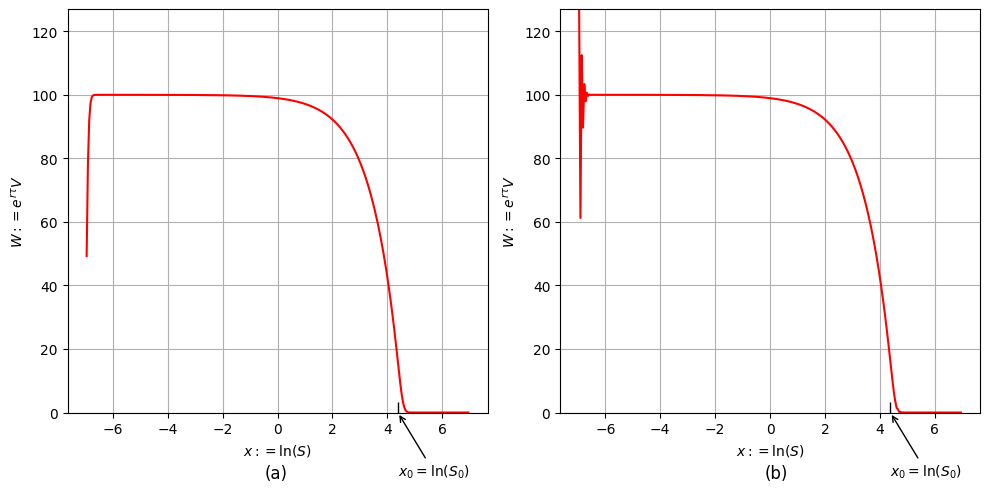

In [103]:
fig = plt.figure(figsize=(10,5))
ylim = max(max(acc_sol_prop),max(acc_sol_improp))

ax1 = fig.add_subplot(121)
ax1.plot(grid, acc_sol_prop, color='red')
ax1.set_ylim(0,ylim)
ax1.set_xlabel(r'$x := \ln(S)$')
ax1.set_ylabel(r'$W := e^{r\tau}V$')
# ax1.set_title(r'Plot of $W$ vs $x$ (Proper Scheme) up to $T_{0}$')
ax1.grid(True)
ax1.text(0.47, -0.15, '(a)', transform=ax1.transAxes, fontsize=12, va='center')
ax1.plot(np.log(S_0),1,marker="|",color='black',markersize=10)
ax1.annotate(r'$x_{0}=\ln(S_{0})$', xy=(np.log(S_0), 0), xytext=(np.log(S_0), 0 - 20),
             arrowprops=dict(arrowstyle="->",facecolor='black'))

ax2 = fig.add_subplot(122)
ax2.plot(grid, acc_sol_improp, color='red')  
ax2.set_ylim(0,ylim)
ax2.set_xlabel(r'$x := \ln(S)$')
ax2.set_ylabel(r'$W := e^{r\tau}V $', fontsize=10)
# ax2.set_title(r'Plot of $W$ vs $x$ (Improper Scheme) up to $T_{0}$')  
ax2.grid(True)
ax2.text(1.66, -0.15, '(b)', transform=ax1.transAxes, fontsize=12, va='center')
ax2.plot(np.log(S_0),1,marker="|",color='black',markersize=10)
ax2.annotate(r'$x_{0}=\ln(S_{0})$', xy=(np.log(S_0), 0), xytext=(np.log(S_0), 0 - 20),
             arrowprops=dict(arrowstyle="->",facecolor='black'))

plt.tight_layout()  
plt.show()

As expected with the improper expression for the central second order difference, as we have not specified the extra boundary conditions required at the boundaries, we will get edge effects whereas we do not encounter this artefact with the proper use of the central second order difference.

## Definition of normal distribution 

Thus far we have simulated the solution for a time $T_{0}$ We now produce the
normla distribution with the parameter $T_{1}$. By taking the appropiately discounted price 
of the inner productt of these two quantities, we can recover the value of the option.


Text(1.66, -0.15, '(b)')

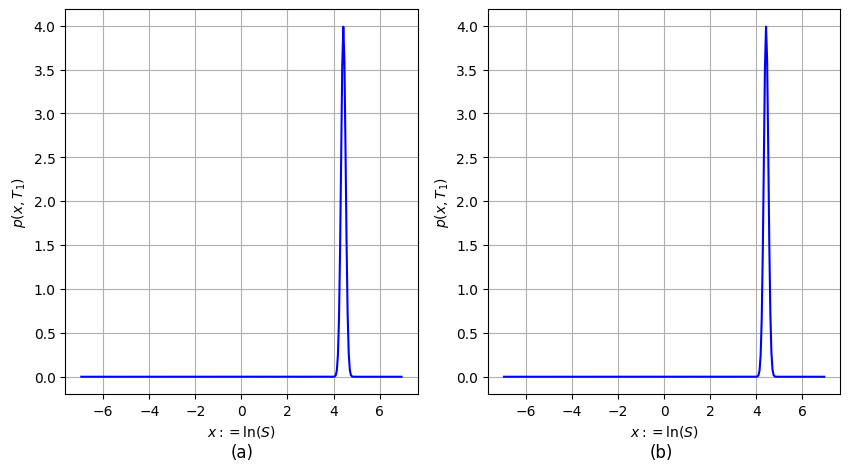

In [104]:
pdf_list_grid = []
pdf_list_cont = []
for i in grid:
    pdf_list_grid.append(normal_1D_stock(i,np.log(S_0),r,vol,T_1))
for j in np.linspace(x_lower+spatial_step,x_upper-spatial_step,1000):
    pdf_list_cont.append(normal_1D_stock(j,np.log(S_0),r,vol,T_1))

fig = plt.figure(figsize=(10,5))
   
ax1 = fig.add_subplot(121)
ax1.plot(grid, pdf_list_grid, color='blue')
ax1.set_xlabel(r'$x := \ln(S)$')
ax1.set_ylabel(r'$p(x,T_{1})$')
# ax1.set_title(r'Plot of $p(x,T_{1})$ continuous')
ax1.grid(True)
ax1.text(0.47, -0.15, '(a)', transform=ax1.transAxes, fontsize=12, va='center')


ax2 = fig.add_subplot(122)
ax2.plot(grid, pdf_list_grid, color='blue')
ax2.set_xlabel(r'$x := \ln(S)$')
ax2.set_ylabel(r'$p(x,T_{1})$')
# ax2.set_title(r'Plot of $p(x,T_{1})$ grid')
ax2.grid(True)
ax2.text(1.66, -0.15, '(b)', transform=ax1.transAxes, fontsize=12, va='center')

In [105]:
x111 = np.round(np.log(S_0),3)

first_list      = [(j,convert_to_x(j,n_grid),np.exp(convert_to_x(j,n_grid))) for j in range(1,n_grid-1)]
first_list_diff = [np.abs(convert_to_x(j,n_grid)-np.log(S_0)) for j in range(1,n_grid-1)]
index = np.argmin(first_list_diff) + 0


markdown_string = f"""
# Extracting the value of the European put option via PDE solution at time $T_{0}$ = {T_0}.
---
For the spot price of $S_{{0}} = {S_0}$, we need to extract the value of solution at approximately
$$
x = \ln({S_0}) \sim {np.round(np.log(S_0),4)}
$$

This roughly corresponds to {index}th component of the solution vector.

As $V = e^{{-r\\tau}}W$, and the fact that the variables $r = {r}$ and $T_0 = {T_0}$, we need to multiply the result by
$$
e^{{-r \\tau}} \Rightarrow e^{{-{r*T_0}}}
$$
Hence the value of the option should be
$$
\\text{{Value of option}} \sim e^{{-{r*T_0}}}W({index}) \sim {np.round(np.exp(-r*T_0),4)}*W({index})
$$

"""
display(Markdown(markdown_string))


# Extracting the value of the European put option via PDE solution at time $T_0$ = 1.
---
For the spot price of $S_{0} = 80$, we need to extract the value of solution at approximately
$$
x = \ln(80) \sim 4.382
$$

This roughly corresponds to 242th component of the solution vector.

As $V = e^{-r\tau}W$, and the fact that the variables $r = 0.05$ and $T_0 = 1$, we need to multiply the result by
$$
e^{-r \tau} \Rightarrow e^{-0.05}
$$
Hence the value of the option should be
$$
\text{Value of option} \sim e^{-0.05}W(242) \sim 0.9512*W(242)
$$



---
Using the analytic solutions to the 1D Black Scholes equation for puts and calls:
$$
V_{call} = N(d_{+})S_{0}-N(d_{-})Ke^{-rT}
$$
$$
V_{put} = N(-d_{-})Ke^{-rT}-N(-d_{-})S_{0}
$$
with $d_{-},d_{+}$ defined as :
$ d_{+} = \frac{1}{\sigma \sqrt{T}}\left(\ln(\frac{S_{0}}{K})+\left(r+\frac{\sigma^2}{2} \right)T  \right); \quad d_{-} = d_{+} -\sigma\sqrt{T}$


In [106]:
##Test the value of the option at S=80 with the improper central difference scheme

value_prop = np.exp(-r*T_0)*acc_sol_prop[index]
value_improp = np.exp(-r*T_0)*acc_sol_improp[index]

print("-------------------\n|Numerical Results|\n-------------------\n")
print("The value of the option with above parameters with proper scheme up to T_0 is   = %f" % (value_prop))
print("The value of the option with above parameters with improper scheme up to T_0 is = %f\n" % (value_improp))
print("------------------\n|Analytic Results|\n------------------\n" + ' '*80 +"----")
print("The value of the option with above parameters at T_0 is                         = %f" % (bs_op.black_scholes_1D_analytic(S_0,K,r,vol,T_0,'put')))

-------------------
|Numerical Results|
-------------------

The value of the option with above parameters with proper scheme up to T_0 is   = 15.617997
The value of the option with above parameters with improper scheme up to T_0 is = 15.660096

------------------
|Analytic Results|
------------------
                                                                                ----
The value of the option with above parameters at T_0 is                         = 15.270513


In [107]:
bs_op.black_scholes_1D_analytic(S_0,K,r,vol,Total_life_option,'put')


np.float64(11.756364280895319)

## Estimating option value at time $T_{0}+T_{1}$ through inner product of probability vector and option value encoded vector.

In [108]:
option_estimate_prop = np.exp(-r*(T_0+T_1))*np.dot(pdf_list_grid,acc_sol_prop)*spatial_step
option_estimate_improp = np.exp(-r*(T_0+T_1))*np.dot(pdf_list_grid,acc_sol_improp)*spatial_step

print("-------------------\n|Numerical Results|\n-------------------\n")
print("The value of the option estimated by inner product with  proper scheme up to T_0 +T_1 is   = %f" % (option_estimate_prop))
print("The value of the option estimated by inner product with improper scheme up to T_0 + T_1 is = %f\n" % (option_estimate_improp))
print("------------------\n|Analytic Results|\n------------------\n" + ' '*91 +"----")
print("The value of the option with above parameters at T_0 is                                    = %f" % (bs_op.black_scholes_1D_analytic(S_0,K,r,vol,T_0+T_1,'put')))

-------------------
|Numerical Results|
-------------------

The value of the option estimated by inner product with  proper scheme up to T_0 +T_1 is   = 11.770429
The value of the option estimated by inner product with improper scheme up to T_0 + T_1 is = 11.773196

------------------
|Analytic Results|
------------------
                                                                                           ----
The value of the option with above parameters at T_0 is                                    = 11.756364
